In [30]:
# importing pandas and the standard python datetime module
import pandas as pd
import numpy as np
import datetime as dt

# importing the data from the csv file
raw_unicorns = pd.read_csv('World_Wide_Unicorn_Startups.csv')
# Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
# cleaning the date (converting to the standard python DateTime object)
raw_unicorns['Date'] = [dt.datetime.strptime(
    d, '%m/%d/%Y').date() for d in raw_unicorns['Date']]

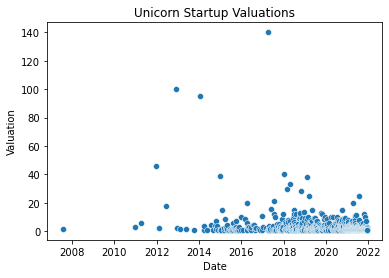

In [9]:
# importing seaborn (a matplotlib helper library)
import seaborn as sns
# pyplot is required to save the plot to a file
import matplotlib.pyplot as plt

# data needs to be in a k,v pair with k being industry and v being date
mapped_unicorn_data = raw_unicorns.sort_values(by=['Date']).set_index('Date')
valuation_data = mapped_unicorn_data['Valuation'].map(lambda x: x)

# plotting the data using seaborn
plot = sns.scatterplot(data=valuation_data)
plt.title('Unicorn Startup Valuations')
plt.savefig('valuation_data.png', facecolor="white", dpi=600, bbox_inches='tight')

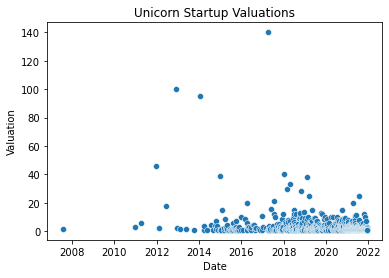

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X, y = raw_unicorns[['Valuation', 'Industry']], raw_unicorns['Date']

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
poly_reg_y_predicted = model.predict(X_test)
from sklearn.metrics import mean_squared_error

poly_reg = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))